In [1]:
import joblib
import numpy as np
import scipy.io as sio
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import h5py

In [2]:
# rawFile = '/home/felix/Documents/uni/BaProj/DeepSeg/01Data_PreProcess/Data_CsiAmplitude/user1/55_iw_1_csi.mat'
# preprocessedFile = '/home/felix/Documents/uni/BaProj/DeepSeg/01Data_PreProcess/Data_CsiAmplitude/user1/55user1_iw_1.mat'

In [3]:
rawFile = '/home/felix/Documents/uni/BaProj/bachelorproject/data/reduced_sample_rate_activity_testing_56.joblib'
preprocessedFile = '/home/felix/Documents/uni/BaProj/DeepSeg/01Data_PreProcess/Data_CsiAmplitude/philipp/55philipp_uc_d.mat'

In [4]:
# extract the N and Wn values from the preprocessed filename (e.g. 55philipp_li_p_N5_Wn0-05)
# use a string format matching by detecting `NX_WnY` where X and Y are numbers
# import re
# match = re.search(r'N\d+_Wn\d+-\d+', preprocessedFile)
# N, Wn = match.group().split('_')
# N = int(N[1:])
# Wn = float(Wn[2:].replace('-', '.'))
# print(f'N: {N}, Wn: {Wn}')


In [5]:
class CSI_Struct:
    def __init__(self, tstamp, channel, chanBW, rate, nr, nc, num_tones, noise, phyerr, rssi, rssi_0, rssi_1, rssi_2, payload_len, csi_len, buf_len):
        self.tstamp = tstamp
        self.channel = channel
        self.chanBW = chanBW
        self.rate = rate
        self.nr = nr
        self.nc = nc
        self.num_tones = num_tones
        self.noise = noise
        self.phyerr = phyerr
        self.rssi = rssi
        self.rssi_0 = rssi_0
        self.rssi_1 = rssi_1
        self.rssi_2 = rssi_2
        self.payload_len = payload_len
        self.csi_len = csi_len
        self.buf_len = buf_len

In [6]:
if rawFile.endswith('.joblib'):
    print('Loading raw data from .joblib file')
    records = joblib.load(rawFile)
    raw_data = records[1]
    raw_trace = raw_data[:,0,0,0]
elif rawFile.endswith('.mat'):
    print('Loading raw data from .mat file')
    raw_data = sio.loadmat(rawFile)['data']
    raw_trace = raw_data[:, 0]
else:
    raise ValueError('File format not supported')

Loading raw data from .joblib file


In [7]:
# preprocessed_data = sio.loadmat(preprocessedFile)['data']
preprocessed_data = h5py.File(preprocessedFile, 'r')['data']
preprocessed_data


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/felix/Documents/uni/BaProj/DeepSeg/01Data_PreProcess/Data_CsiAmplitude/philipp/55philipp_uc_d.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [9]:
preprocessed_data[0]

array([[-3.01987903e-04, -2.72127665e-03, -1.18392804e-02, ...,
         1.84238142e+01,  1.74673582e+01,  1.62867762e+01],
       [-3.55830707e-04, -3.23936642e-03, -1.42737555e-02, ...,
         2.08709009e+01,  1.97168606e+01,  1.83121206e+01],
       [-3.88604588e-04, -3.57386048e-03, -1.59557610e-02, ...,
         2.27402605e+01,  2.15258065e+01,  2.00388904e+01],
       ...,
       [ 1.33436515e-04,  1.53577087e-03,  8.57840956e-03, ...,
         5.87946654e+00,  6.83727148e+00,  7.78852955e+00],
       [ 1.10026600e-04,  1.28079403e-03,  7.24567823e-03, ...,
         5.08251992e+00,  6.21816677e+00,  7.34409389e+00],
       [ 8.19347023e-05,  9.86058587e-04,  5.73948030e-03, ...,
         5.54592622e+00,  6.79452342e+00,  8.01960478e+00]])

In [10]:
# preprocessed_data = np.array(preprocessed_data)
preprocessed_trace = preprocessed_data[0,0,:]

In [11]:
preprocessed_data.shape

(3, 30, 30092)

In [12]:
assert raw_trace.shape == preprocessed_trace.shape
raw_trace.shape

(30092,)

<Axes: >

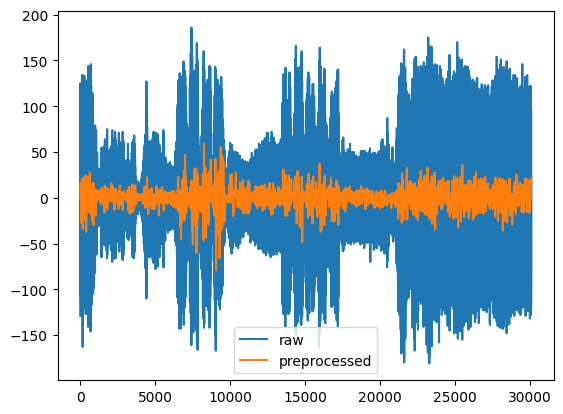

In [13]:
# set the title of this plot
# plt.title(f'Raw vs Preprocessed data for N={N} and Wn={Wn}')

sns.lineplot(raw_trace, label='raw')
sns.lineplot(preprocessed_trace, label='preprocessed')

# save this plot to file
# plt.savefig(f"raw_vs_preprocessed_N{N}_Wn{str(Wn).replace('.', '-')}.png")